<a href="https://colab.research.google.com/github/ilhammsuryaman/Pemograman_Python/blob/main/Pertemuan%2010%20_image%20classification%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

'1101194046_Ilham Mohammad Suryaman.pdf'
 1.jpg
 1.mp4
 23B18395-2ECE-4B74-97C5-E1CFC6CE152D.png
 2.mp4
'31_Ilham Mohammad Suryaman.pdf'
 3A684472-98F1-4FC0-B802-AA87E209A967.jpeg
 3Scene/
 5AD0623D-B5CC-4F0D-8EAD-460364C1D653.jpeg
 716A2CE8-D99E-429C-91BF-F8FD38929B5A.png
 76C00401-48AC-4C06-AD96-03B7973087A4.jpeg
 Classroom/
'Esai_Ilham Mohammad Suryaman_Telkom University_Pengaruh Sosial Media.pdf'
'FE882473-6BAA-4447-B995-5D1BB8C48BFC - Ilham Suryaman.jpeg'
 FE882473-6BAA-4447-B995-5D1BB8C48BFC.jpeg
'File Rocks'/
 GOPR1077.MP4
'Ilham M Suryaman_TT-43-08 (1).pdf'
'Ilham M Suryaman_TT-43-08.pdf'
'JURNAL JARTEL_2_ILHAM MOHAMMAD SURYAMAN_1101194046_SHIFT 2.pdf'
'JURNAL_MODUL3_ILHAM MOHAMMAD SURYAMAN_1101194046_2.pdf'
'JURNAL_MODUL 4_ILHAM M SURYAMAN_1101194046_2.pdf'
'JURNAL_MODUL5_ILHAM MOHAMMAD SURYAMAN_1101194046_2.pdf'
'Kelompok 11_TT-43-08_D-GAME.rar'
 KORUPSI.mp4
'KTM_FILMPENDEK_Cuan_Ilham Mohammad Suryaman - Ilham Suryaman.rar'
'KTM_FILMPENDEK_Cuan_Ilham Mohammad Suryaman.rar'
'M

In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3Scene")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)


	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(238, 128, 128, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               4915300   
_________________________________________________________________
layer2 (Dense)               (None, 32)                3232      
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 4,919,111
Trainable params: 4,919,111
Non-trainable params: 0
_________________________________________________________________


In [13]:
print("[INFO] training network...")
opt = Adam(lr=1e-5, decay=1e-5 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

[INFO] training network...
Epoch 1/30
23/23 [==============================] - 1s 49ms/step - loss: 0.9711 - accuracy: 0.5288 - val_loss: 0.9298 - val_accuracy: 0.5252
Epoch 2/30
23/23 [==============================] - 1s 41ms/step - loss: 0.8472 - accuracy: 0.6624 - val_loss: 0.8116 - val_accuracy: 0.6555
Epoch 3/30
23/23 [==============================] - 1s 42ms/step - loss: 0.7665 - accuracy: 0.6948 - val_loss: 0.8088 - val_accuracy: 0.6765
Epoch 4/30
23/23 [==============================] - 1s 42ms/step - loss: 0.7121 - accuracy: 0.7173 - val_loss: 0.7462 - val_accuracy: 0.7269
Epoch 5/30
23/23 [==============================] - 1s 43ms/step - loss: 0.6824 - accuracy: 0.7384 - val_loss: 0.7664 - val_accuracy: 0.7017
Epoch 6/30
23/23 [==============================] - 1s 42ms/step - loss: 0.6628 - accuracy: 0.7581 - val_loss: 0.7053 - val_accuracy: 0.7353
Epoch 7/30
23/23 [==============================] - 1s 42ms/step - loss: 0.6090 - accuracy: 0.7932 - val_loss: 0.6945 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


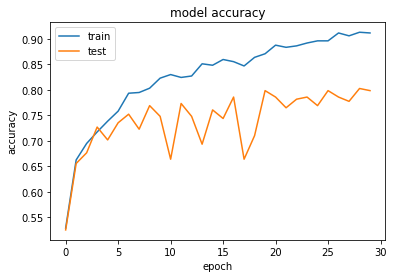

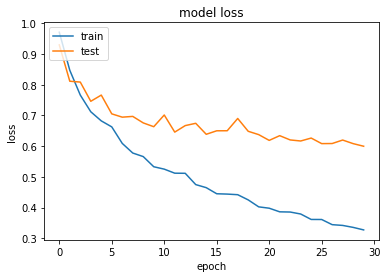

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.75      0.83      0.79        93
      forest       0.86      0.80      0.82        83
     highway       0.80      0.76      0.78        62

    accuracy                           0.80       238
   macro avg       0.80      0.79      0.80       238
weighted avg       0.80      0.80      0.80       238



In [16]:


model.save('nnmodel_scene')



Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [21]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/3Scene/coast/labuan-bajo.jpg'

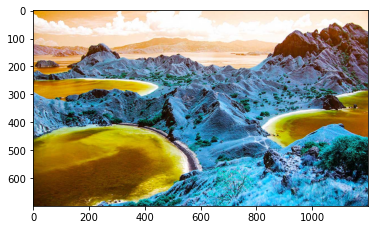

In [22]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [23]:
image_testing = Image.open('/content/drive/MyDrive/3Scene/coast/labuan-bajo.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [24]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [25]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.64729613 0.28763995 0.06506398]]
['coast']
